In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


## Eksploracyjna analiza danych (EDA) 

In [2]:
df = pd.read_csv("support2.csv")


df.info()

# Mamy 3 typy danych - float64, int64, object

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       7471 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9104 non-null   float64
 12  charges   8933 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9023 non-null   float64
 16  race      9063 non-null   object 
 17  sps       9104 non-null   float64
 18  aps       9104 non-null   float64
 19  surv2m    9104 non-null   float64
 20  surv6m    9104 non-null   float64
 

In [3]:
pd.set_option('display.max_columns', None)
df.describe()


,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,surv6m,hday,diabetes,dementia,prg2m,prg6m,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,9104.000000,9104.000000,9105.000000,9105.000000,9105.000000,7456.000000,7472.000000,9075.000000,9104.000000,8893.000000,9104.000000,9104.000000,9104.000000,6780.000000,5733.000000,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,0.635870,0.520096,4.400000,0.195277,0.032510,0.618769,0.499679,14.582590,84.546408,12.347677,97.156711,23.330294,37.103341,239.529070,2.950520,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,0.248175,0.253343,9.126811,0.396436,0.177359,0.298367,0.304367,19.944216,27.687692,9.266329,31.559292,9.573801,1.251796,109.665593,0.875944,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,0.507690,0.342957,1.000000,0.000000,0.000000,0.500000,0.200000,4.000000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.399902,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,0.715942,0.574951,1.000000,0.000000,0.000000,0.700000,0.500000,9.000000,77.000000,10.599609,100.000000,24.000000,36.695310,224.000000,2.899902,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,0.825928,0.725952,3.000000,0.000000,0.000000,0.900000,0.750000,17.000000,107.000000,15.298828,120.000000,28.000000,38.195310,304.750000,3.599609,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,0.969971,0.947998,148.000000,1.000000,1.000000,1.000000,1.000000,285.000000,195.000000,200.000000,300.000000,90.000000,41.695310,890.375000,29.000000,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


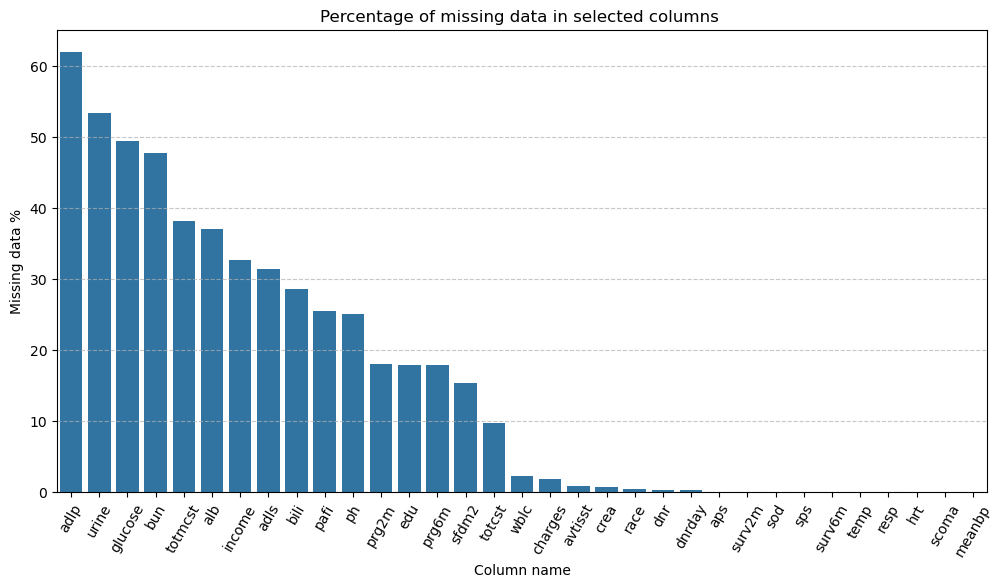

In [4]:
# Wykres braków danych przed przetworzeniem 

missing_percentage = df.isnull().mean() * 100

missing_percentage = missing_percentage[missing_percentage > 0]

missing_percentage = missing_percentage.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=60)
plt.title('Percentage of missing data in selected columns ')
plt.ylabel('Missing data %')
plt.xlabel('Column name')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
# Pozbycie się błędnych danych, które zostały znalezione po użyciu describe()

# Zmienione zostały wartości, o których jestem w stanie jasno stwierdzić, że są niemożliwe. Niektóre odstające wartości można wytłumaczyć krytycznem stanem pacjenta, więc nie ma podstaw by
# je zmieniać

# Dla kolumny dnrday jej opis sugeruje że ujemne wartości są błedne, dla pozostałych naprawionych poniżej wartości == 0 nie są możliwe u żyjącego pacjenta, 
# który podczas wykonywania pomiaru żył

print((df['dnrday'] < 0).sum()) # 195 wartosci wymagajacych naprawy
print((df['meanbp'] == 0).sum()) # 51 wartosci wymagajacych naprawy
print((df['glucose'] == 0).sum()) # 1 wartość (kompletnie nie znacząca liczba w kontekście ilości danych ale mozna zmienic)
print((df['hrt'] == 0).sum()) # 83 wartosci wymagajacych naprawy

# Zamieniamy na NaN, który później uzupełnimy średnią z pozostałych obserwacji

df.loc[df['dnrday'] < 0, 'dnrday'] = np.nan
df.loc[df['meanbp'] == 0, 'meanbp'] = np.nan
df.loc[df['glucose'] == 0, 'glucose'] = np.nan
df.loc[df['hrt'] == 0, 'hrt'] = np.nan

195
51
1
83


## Feature Engineering

In [6]:
# wskaźnik wstrząsu = tętno / średnie ciśnienie, wartość > 1.0 oznacza podwyższone ryzyko zgonu (https://pl.wikipedia.org/wiki/Wskaźnik_Allgöwera) - dokładny opis 

df["shock_index"] = df["hrt"] / df["meanbp"]






In [7]:
# Skąd biorą się te konkretne dane do uzupełnienia - According to the HBiostat Repository (https://hbiostat.org/data/repo/supportdesc, 
# Professor Frank Harrell) the following default values have been found to be useful in imputing missing baseline physiologic data:

fill_data = {     
    "alb": 3.5,
    "pafi": 333.3,
    "bili": 1.01,
    "crea": 1.01,
    "bun": 6.51,
    "wblc": 9,
    "urine": 2502
}

# wypełnienie braków w konkretnych kolumnach
df.fillna(value=fill_data, inplace=True)

# w jakich kolumnach brakuje najwiecej danych po wstepnym uzupelnieniu
missing_data = df.isnull().mean()
missing_data = missing_data[missing_data > 0].sort_values(ascending = False)  
missing_data




adlp           0.619550
glucose        0.494344
totmcst        0.381658
income         0.327512
adls           0.314882
ph             0.250851
prg2m          0.181109
edu            0.179462
prg6m          0.179352
sfdm2          0.153762
totcst         0.097529
dnrday         0.024712
charges        0.018891
shock_index    0.009665
hrt            0.009226
avtisst        0.009006
meanbp         0.005711
race           0.004613
dnr            0.003295
scoma          0.000110
aps            0.000110
sod            0.000110
temp           0.000110
surv2m         0.000110
sps            0.000110
surv6m         0.000110
resp           0.000110
dtype: float64

In [8]:

# chcemy sprawdzić jakie cechy mają rozkład skośny i przywrócić je do rozkładu zbliżonego do normalnego, aby model lepiej je interpretował

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
cols_to_check = [c for c in numeric_cols if df[c].nunique() > 10]
skew_vals = df[cols_to_check].skew().sort_values(ascending=False)

# Filtrujemy silnie skośne zmienne (> 1.0)
high_skew = skew_vals[abs(skew_vals) > 1.0]
print("Zmienne o silnej skośności (>1.0):")
print(high_skew)

skewed_features = ["bili", "crea", "bun", "wblc", "glucose", "alb", "shock_index"]

# bierzemy log(1+x) aby przy wartościach bliskich lub równych 0 nie dążyć do -inf

for col in skewed_features:
    if col in df.columns:
        df[f"log_{col}"] = np.log1p(df[col])
df = df.drop(columns = skewed_features)


Zmienne o silnej skośności (>1.0):
hday           5.850333
bili           5.780172
charges        4.687144
slos           4.624615
totmcst        4.363700
alb            4.336841
dnrday         4.323392
wblc           4.316089
totcst         3.955230
crea           3.239067
bun            2.586122
glucose        2.580542
scoma          2.333585
shock_index    2.123958
sps            1.604662
d.time         1.199262
ph            -1.028938
surv2m        -1.041119
dtype: float64


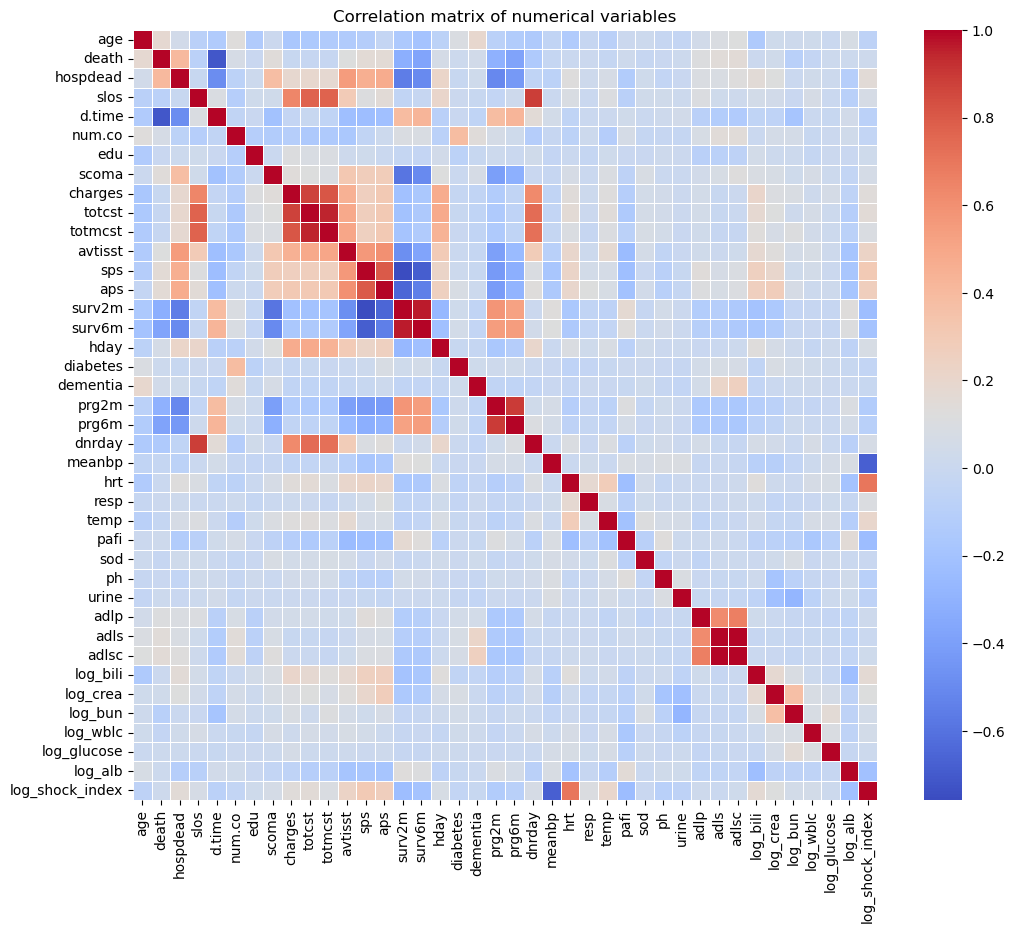

In [9]:
# Macierz korelacji może przydać się w uzupełnieniu braków danych. Jeśli znajdziemy dwie silnie skorelowane cechy, możemy użyć jednej z nich do 
# uzupełnienia braków w drugiej

plt.figure(figsize = (12, 10))
numeric_df = df.select_dtypes(include = ["int64", "float64"])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, cmap = "coolwarm", linewidths = 0.5, annot = False)
plt.title("Correlation matrix of numerical variables")
plt.show()

# Nie widać silnej korelacji z żadną cechą dla danych które mają najwieksze braki, więc będziemy stosować zwykłe uzupełnianie po średniej wartości z danej kolumny

# Data Cleaning



In [10]:
# Pozbywamy się wycieku danych - d.time i hospdead wprost mówią że pacjent zmarł, surv2m i surv6m są predykcją innego modelu, którego działania nie znamy, więc dla pewności usuwam dane 
# sfdm2 zawiera jedną możliwą wartość która praktycznie mówi o śmierci pacjenta (<2 mo. follow-up) - odkryte na podstawie końcowego wykresu,
# gdzie waga tej kolumny znacznie przeważała nad innymi, więc też trzebą ją usunąć
# Kolumny slos, charges, totcst, totmcst mają dane z przyszłościm więc je również usuwamy

cols_to_drop = ["d.time", "hospdead", "surv2m", "surv6m", "sfdm2", "slos", "charges", "totcst", "totmcst"]
df = df.drop(columns = cols_to_drop)


# Pipeline i przetwarzanie

In [11]:
# Podział na dane testowe i treningowe z zachowaniem propocji wartości cechy death w X i y

X = df.drop(columns = ["death"])
y = df["death"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 79, stratify = y
)

# Widzimy dyspropocje pacjentów zmarłych, co może negatywnie wpłynąć na wyniki modelu

print(y.value_counts())   

death
1    6201
0    2904
Name: count, dtype: int64


In [12]:
# Rodzielenie na kolumny numeryczne i kategoryczne

num_cols = X.select_dtypes(include = ["int64", "float64"]).columns
cat_cols = X.select_dtypes(include = ["object"]).columns
print(cat_cols)

Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr'], dtype='object')


In [13]:
# Trasformacja danych - zeskalowanie (StandardScaler), zamiana kategorycznych na liczbowe (OneHotEncoding), uzupełnienie nienaprawionych wcześniej braków danych (SimpleImputer)

num_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore", sparse_output = False))
])

preprocessor = ColumnTransformer(transformers = [
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])




# Model Tuning

In [14]:
# Wyszkujemy najlepsze parametry do naszego modelu (Model tuning za pomocą Grid search), za pomocą sprawdzenia wszystkich kombinacji
# class_weight='balanced' zwiększa kary za błędy na mniejszej klasie (zgonach), co poprawia czułość modelu
# duża liczba iteracji aby uzyskać zbieżność wyniku

pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight = "balanced", max_iter = 2000, random_state = 20))
])

# C: siła regularyzacji modelu
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__solver": ["lbfgs", "liblinear"]
}

# 10-krotne cross validation aby zoptymalizować metrykę ROC AUC

grid_search = GridSearchCV(pipeline, param_grid, cv = 10, scoring = "roc_auc", n_jobs = -1)
grid_search.fit(X_train, y_train)

# wybieramy najlepszy model

best_model = grid_search.best_estimator_


# Ewaluacja

In [15]:
# Sprawdzamy model na zbiorze testowym

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

In [16]:
# Różne metryki dokładności modelu

print(f"Accuracy: {accuracy_score(y_test, y_pred):%} ")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 75.256223% 
ROC AUC: 0.8503175027191163

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.82      0.68       871
           1       0.89      0.72      0.80      1861

    accuracy                           0.75      2732
   macro avg       0.74      0.77      0.74      2732
weighted avg       0.79      0.75      0.76      2732



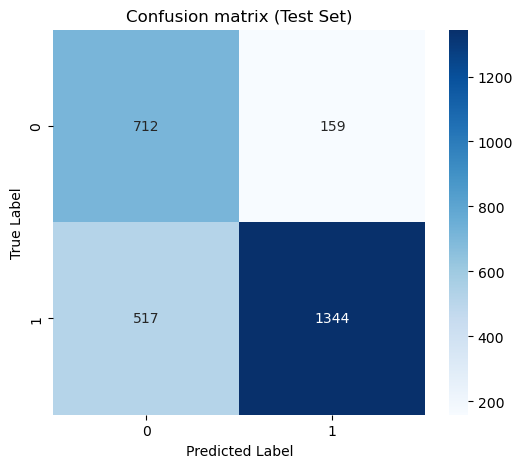

In [17]:
# Confusion matrix - mówi nam jakie błędy popełnia model, a kiedy poprawnie trafia

plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion matrix (Test Set)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Interpretacja

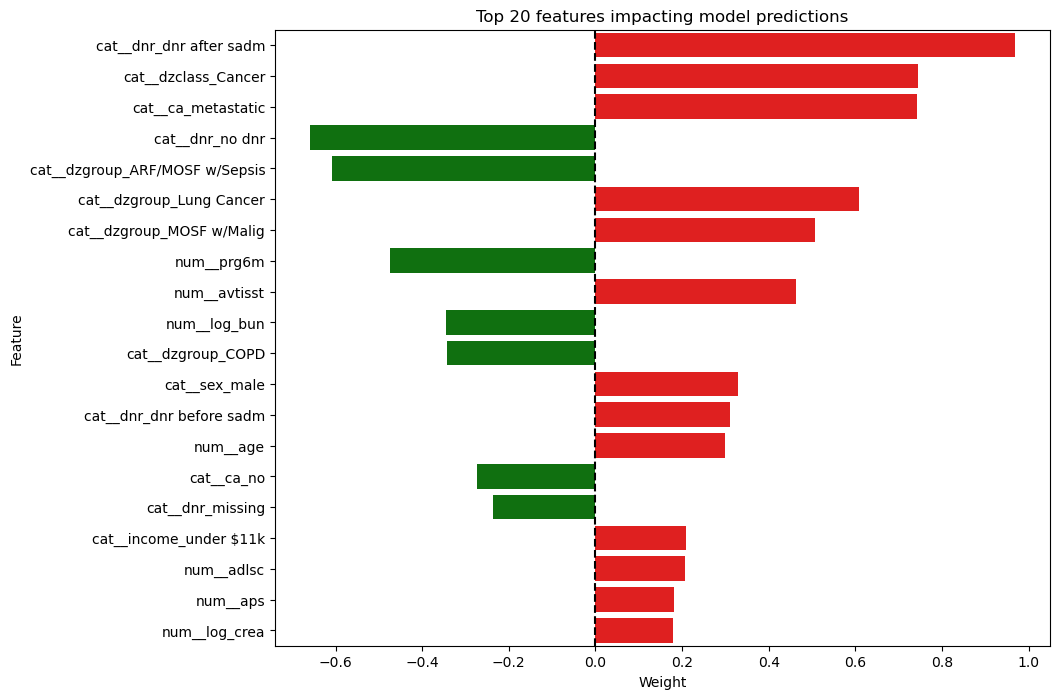

In [ ]:
# Sprawdzamy jakie cechy najbardziej wpływają na nasz model


feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()
coeffs = best_model.named_steps["classifier"].coef_[0]

feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Weight": coeffs,
    "Abs_Weight": np.abs(coeffs)
})

# Wybieramy top 20 najważniejszych cech

top_features = feature_importance.sort_values(by = "Abs_Weight", ascending = False).head(20)

plt.figure(figsize = (10, 8))
colors = ["red" if x > 0 else "green" for x in top_features["Weight"]]
sns.barplot(x = "Weight", y = "Feature", data = top_features, palette = colors, hue = "Feature", legend = False)
plt.title("Top 20 features impacting model predictions")
plt.xlabel("Weight")
plt.axvline(x = 0, color = "black", linestyle = "--")
plt.show()


# Uzyskane wyniki mają sens, przykładowo - decyzja DNR (Do Not Resuscitate) jest najsilniejszym predyktorem zgonu, co odzwierciedla ciężki stan pacjentów kwalifikowanych do tej procedury.